# Getting the sky on mars

2460036.0


/opt/anaconda3/envs/CodeAstro_Env/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/opt/anaconda3/envs/CodeAstro_Env/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/opt/anaconda3/envs/CodeAstro_Env/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/opt/anaconda3/envs/CodeAstro_Env/lib/python3.12/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "epv00" yielded 1 of "warning: date outsidethe range 1900-2100 AD"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


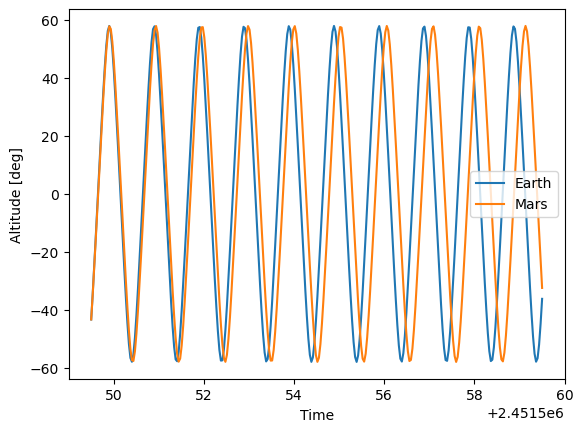

In [34]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, Longitude
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt

def get_julian_date(earth_time):
    # Convert Earth time to Julian Date
    earth_time_astropy = Time(earth_time, format='iso', scale='utc')
    return earth_time_astropy.jd

def scale_julian_date(julian_date):
    # Mars' sidereal period in days
    mars_sidereal_period = 1.027491
    
    # Convert Julian Date to Astropy Time object
    # time = Time(julian_date, format='jd')
    
    # Calculate the fraction of a day since a known Mars LST epoch (JD)
    jd_since_epoch = julian_date - 2451549.5 # - 0.00886519
    mars_jd_equivilent = jd_since_epoch / mars_sidereal_period
    
    return mars_jd_equivilent

def get_mars_sky_coords(julian_date, mars_location_longitude, mars_location_latitude):
    # Calculate Local Sidereal Time (LST) for the given Mars location and time
    mars_jd = scale_julian_date(julian_date)
    
    # Assuming you have the longitude and latitude for your observation point on Mars
    mars_location = EarthLocation(lat=mars_location_latitude*u.deg, lon=mars_location_longitude*u.deg, height=0*u.m)
    
    # Convert to AltAz frame at the given LST and location on Mars
    altaz = AltAz(obstime=Time(mars_jd, format='jd'), location=mars_location)
    
    # Example: Get the sky position of Sirius
    sirius = SkyCoord.from_name('Sirius')
    sirius_altaz = sirius.transform_to(altaz)
    
    #print(f"Sirius's position on Mars at jd {julian_date}: Altitude {sirius_altaz.alt}, Azimuth {sirius_altaz.az}")
    return sirius_altaz.alt.value

def get_earth_sky_coords(julian_date, earth_location_longitude, earth_location_latitude):
    
    
    # Assuming you have the longitude and latitude for your observation point on Mars
    earth_location = EarthLocation(lat=earth_location_latitude*u.deg, lon=earth_location_longitude*u.deg, height=0*u.m)
    
    # Convert to AltAz frame at the given LST and location on Mars
    altaz = AltAz(obstime=Time(julian_date- 2451549.5, format='jd'), location=earth_location)
    
    # Example: Get the sky position of Sirius
    sirius = SkyCoord.from_name('Sirius')
    sirius_altaz = sirius.transform_to(altaz)
    
    #print(f"Sirius's position on Mars at jd {julian_date}: Altitude {sirius_altaz.alt}, Azimuth {sirius_altaz.az}")
    return sirius_altaz.alt.value



# Example usage
earth_time = "2023-04-01 12:00:00"
julian_date = get_julian_date(earth_time)
print(julian_date)
get_mars_sky_coords(julian_date, mars_location_longitude=0, mars_location_latitude=0)
get_earth_sky_coords(julian_date, earth_location_longitude=0, earth_location_latitude=0)


# Plot an ephemeris centered around the time and date

# get times (date minus half of a day) 
timepoints = Time(2451549.5, format='jd') + np.linspace(0, 10, 300)
earth_alt = []
mars_alt = []
for time in timepoints:
    julian_date = time.jd
    # mars_jd = scale_julian_date(julian_date)

    earth_alt.append(get_earth_sky_coords(julian_date, earth_location_longitude=0, earth_location_latitude=0))
    mars_alt.append(get_mars_sky_coords(julian_date, mars_location_longitude=0, mars_location_latitude=0))


plt.plot(timepoints.value, earth_alt, label='Earth')
plt.plot(timepoints.value, np.array(mars_alt), label='Mars')
plt.xlabel('Time')
plt.ylabel('Altitude [deg]')
plt.legend()
plt.show()